In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

params = { 'axes.titlesize' : 'xx-large',
           'axes.labelsize' : 'x-large',
           'figure.figsize' : (8,6)
         }

rcParams.update(params)


In [3]:
M=100

n=1

l_r=0.05

epochs=80

In [4]:
x, y = make_regression(n_samples=M, n_features=n,n_informative=n, n_targets=1, noise=10, random_state=42)

In [5]:
def plot_graph(x,y):
    
    plt.scatter(x, y, alpha=0.8)
    plt.title('dataset')
    plt.xlabel('X')
    plt.ylabel('Y')
    
    plt.show()

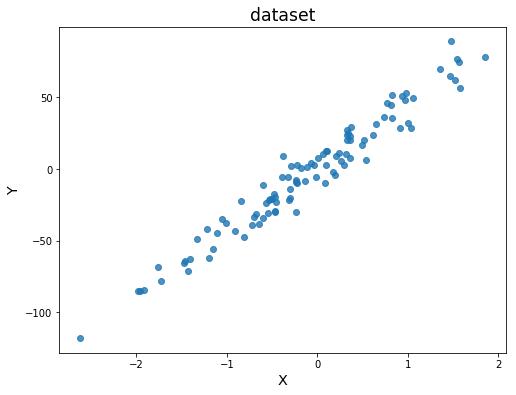

In [6]:
plot_graph(x,y)

In [7]:
print('shape of vector :',x.shape)
print('shape of vector :',y.shape)

shape of vector : (100, 1)
shape of vector : (100,)


In [8]:
def reset_sizes(*args):
    
    return tuple(arg.reshape((arg.shape[0],1)) for arg in args)
    
    

In [9]:
x, y = reset_sizes(x,y)

In [10]:
print(x.shape)
print(y.shape)


(100, 1)
(100, 1)


In [11]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2)

In [12]:
y_train.shape

(80, 1)

In [13]:
def init_params():
    
    m=np.random.normal(scale=10)
    b=np.random.normal(scale=10)
    
    return m,b

In [14]:
m, b = init_params()

In [15]:
def plot_graph(dataset, pred_line=None):
    
    x, y = dataset['x'], dataset['y']
    
    plt.scatter(x, y, alpha=0.8)
    
    if(pred_line != None):
        
        x_line, y_line =  pred_line['x_line'], pred_line['y_line']
        plt.plot(x_line ,y_line, linewidth=2, markersize=12, color='green', alpha=0.8)
        plt.title('predicted line on dataset')
 
    else:
            
            plt.title('dataset')
            plt.xlabel('X')
            plt.ylabel('Y')
plt.show()
    

In [16]:
def plot_pred_line(x, y, m, b):
    
    x_line = np.linspace(np.min(x),np.max(x),10)
    
    y_line = m * x_line + b
    
    dataset = {'x': x , 'y': y}
    
    pred_line = {'x_line' : x_line, 'y_line': y_line}
    
    plot_graph(dataset, pred_line)
    
    return

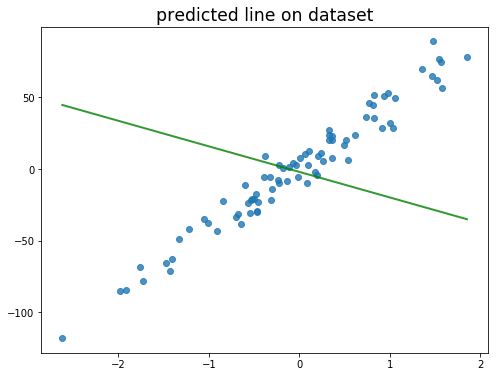

In [17]:
plot_pred_line(x_train, y_train ,m , b)

In [18]:
def forward_prop(x,m,b):
    
    y_pred = m * x + b
    
    return y_pred

In [19]:
y_pred = forward_prop(x_train, m , b)

In [20]:
def compute_loss(y,y_pred):
    
    loss = 1 / 2 * np.mean ((y-y_pred)**2)
    
    return loss

In [21]:
losses = []

In [22]:
loss = compute_loss(y_train, y_pred) 
losses.append(loss)
print(loss)


1672.2221511087926


In [23]:
def plot_graph(dataset, pred_line, losses=None):
    
    plots = 2 if (losses!=None) else 1
    
    fig = plt.figure(figsize=(8 * plots, 6))
    
    x, y = dataset['x'], dataset['y']
    
    x_line , y_line = pred_line['x_line'], pred_line['y_line']
    
    ax1 = fig.add_subplot(1, plots , 1)

    ax1.scatter(x , y, alpha=0.8)
    
    if(pred_line != None):
        
        x_line, y_line = pred_line['x_line'], pred_line['y_line']
    
        ax1.plot(x_line, y_line, linewidth= 2,markersize=14,color = 'green',alpha=0.8)
    
        ax1.set_title('line on dataset')
    
    else:
        
        ax1.set_title('dataset')
        
        ax1.set_xlabel('X')
        ax1.set_ylabel('Y')
        
        
    if(losses!=None):
        
        ax2 = fig.add_subplot(1, plots, 2)
        
        ax2.plot(np.arange(len(losses)),losses, marker='o')
        
        ax2.set_title('loss')
        
        ax2.set_xlabel('epoch')
        ax2.set_ylabel('loss')
    

plt.show()
        
       

In [24]:
def plot_pred_line(x, y, m, b, losses=None):
    
    x_line = np.linspace(np.max(x), np.min(x), 10)
    
    y_line = m * x_line + b
    
    dataset = {'x': x , 'y': y}
    
    pred_line = {'x_line' : x_line, 'y_line': y_line}
    
    plot_graph(dataset, pred_line, losses=losses)
    
    return
   

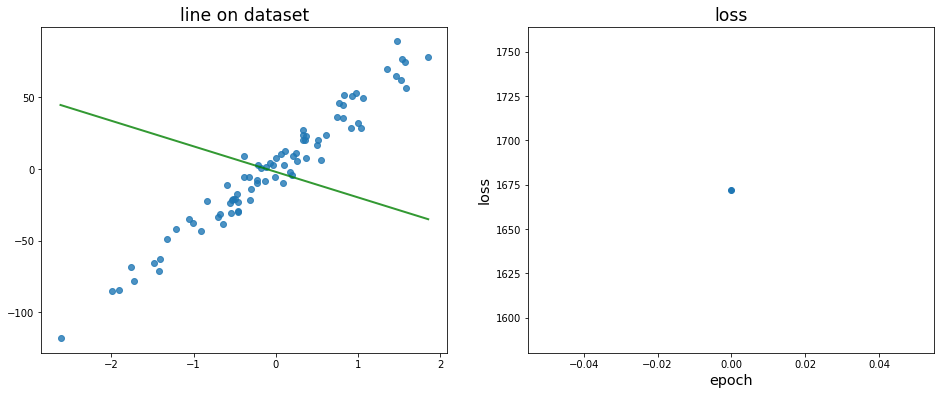

In [25]:
plot_pred_line(x_train, y_train, m, b, losses)

In [26]:
def gradient(m, b, x_train, y_train, y_pred):
    
    dm = np.mean((y_pred - y_train) * x_train)
    
    db = np.mean(y_pred - y_train)
    
    return dm,db

In [27]:
def update_pramas(m, b, dm, db, l_r):
    
    m -= l_r * dm 
    
    b -= l_r * db
    
    return m,b

In [28]:
def gradient_desc(x_train, y_train, y_pred, m, b, l_r):
    
    dm, db = gradient(m, b, x_train, y_train, y_pred)
    
    m, b = update_params(m, b, dm, db, l_r)
    
    return m, b

In [29]:
M=100

n=1

l_r=0.05

epochs=80

In [30]:
x, y = make_regression(n_samples=M, n_features=n, n_informative=n, 
                         n_targets=1, random_state=42, noise=10)

dataset = {'x': x, 'y': y}

plot_graph(dataset)

m, b = init_params()

x, y = reset_sizes(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

losses = []

for i in range(epochs):
    y_pred = forward_prop(x_train, m, b)

    loss = compute_loss(y_train, y_pred)
    losses.append(loss)

    m, b = grad_desc(x_train, y_train, y_pred, m, b, l_r)

    if(i%10==0):
        print('Epoch: ', i)
        print('Loss = ', loss)
        plot_pred_line(x_train, y_train, m, b, losses)

del losses[:]

TypeError: plot_graph() missing 1 required positional argument: 'pred_line'